# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [2]:
data1.head()

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240


## FOR DATA 1


In [3]:
from sklearn.model_selection import train_test_split
features = [x for x in data1.columns if x != 'y']

X = pd.DataFrame(data1['X'])
y = data1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 80
Records in test data: 20

Features:
X


In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

score = reg.score(X_test, y_test)
print('R-squared score: {:.2f}'.format(score))



R-squared score: 0.99


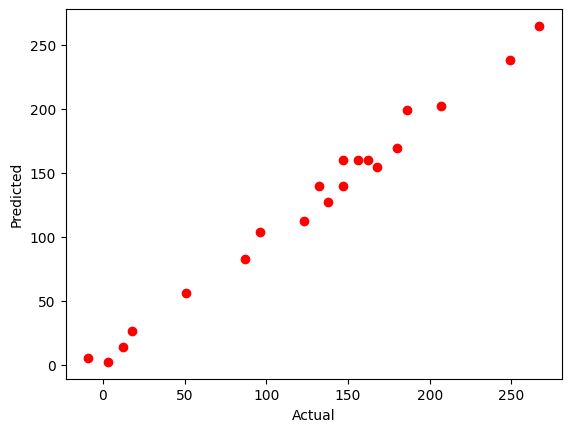

In [5]:
import matplotlib.pyplot as plt


predictions = reg.predict(X_test)
plt.plot(y_test, predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted') 
plt.show()

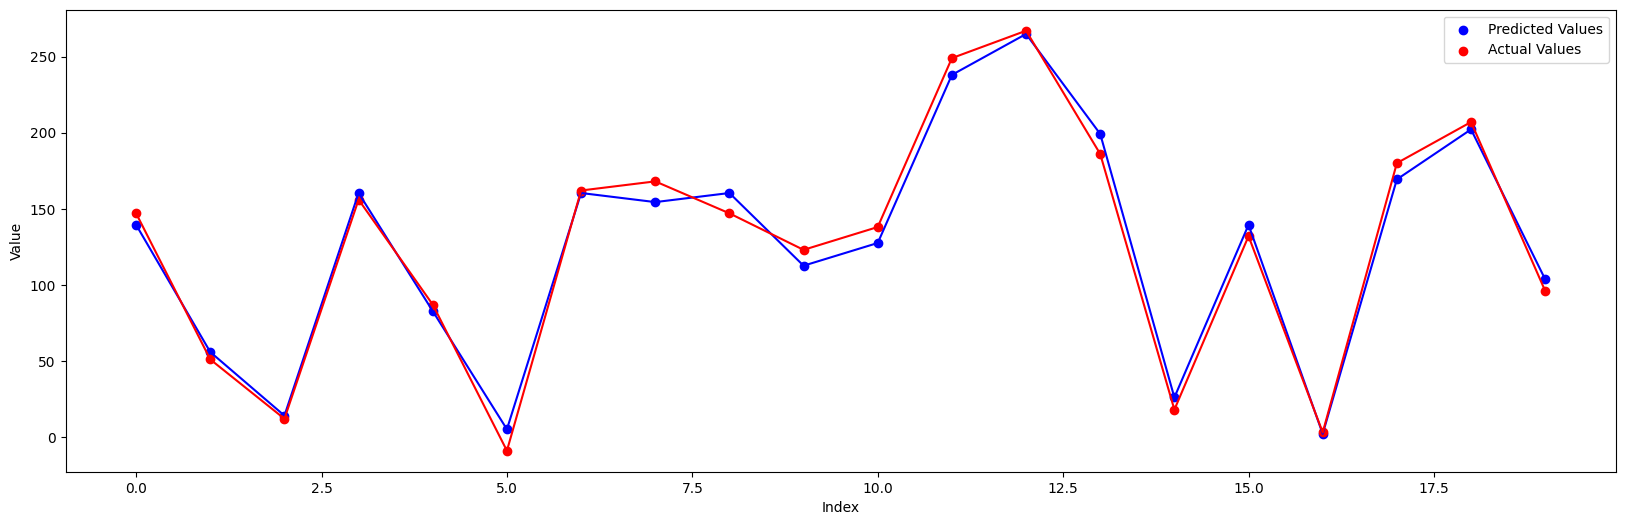

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(np.arange(len(predictions)), predictions, c='blue', label='Predicted Values')
ax.plot(np.arange(len(predictions)), predictions, c='blue')
ax.scatter(np.arange(len(y_test)), y_test, c='red', label='Actual Values')
ax.plot(np.arange(len(predictions)), y_test, c='red')

ax.set_xlabel('Index')
ax.set_ylabel('Value')

ax.legend()


## Findings for DATA 1
The model is performing well as the predicted values are highly correlated with the actual values

## FOR DATA 2

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data2[['X2']])

In [8]:
one_hot_encoded_data = pd.get_dummies(data2, columns = ['X2'])
print(one_hot_encoded_data)

    Unnamed: 0  X1     y  X2_A  X2_B
0            0  50  2510     0     1
1            1  82  6738     0     1
2            2  66  4355     0     1
3            3  35  2225     1     0
4            4  81  7560     1     0
..         ...  ..   ...   ...   ...
95          95  98  9615     0     1
96          96   9  1066     1     0
97          97  56  4139     1     0
98          98  50  2502     0     1
99          99  53  3815     1     0

[100 rows x 5 columns]


In [9]:
one_hot_encoded_data.head()

,Unnamed: 0,X1,y,X2_A,X2_B
0,0,50,2510,0,1
1,1,82,6738,0,1
2,2,66,4355,0,1
3,3,35,2225,1,0
4,4,81,7560,1,0


In [10]:
X2=one_hot_encoded_data[['X1','X2_A','X2_B']]
Y2=one_hot_encoded_data.y


In [11]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=100)

print(f'Records in training data: {X2_train.shape[0]:,}')
print(f'Records in test data: {X2_test.shape[0]:,}')
print('\nFeatures:')
print(*X2_train.columns, sep='\n')

Records in training data: 80
Records in test data: 20

Features:
X1
X2_A
X2_B


In [12]:
reg_multi = LinearRegression().fit(X2_train, y2_train)
score= reg_multi.score(X2_test,y2_test)
print("R Squared Score: ", score)

R Squared Score:  0.8768471364265771


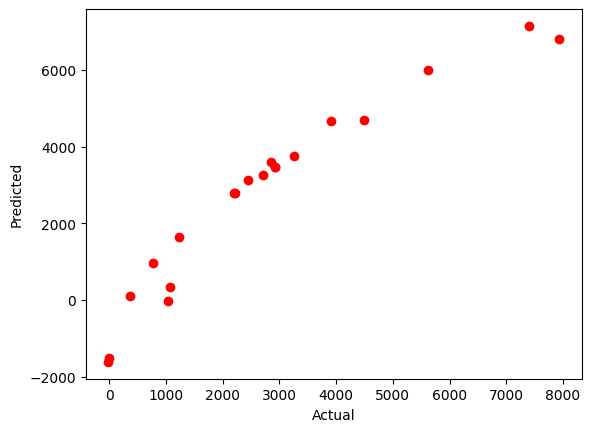

In [13]:
import matplotlib.pyplot as plt


predictions = reg_multi.predict(X2_test)
plt.plot(y2_test, predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted') 
plt.show()

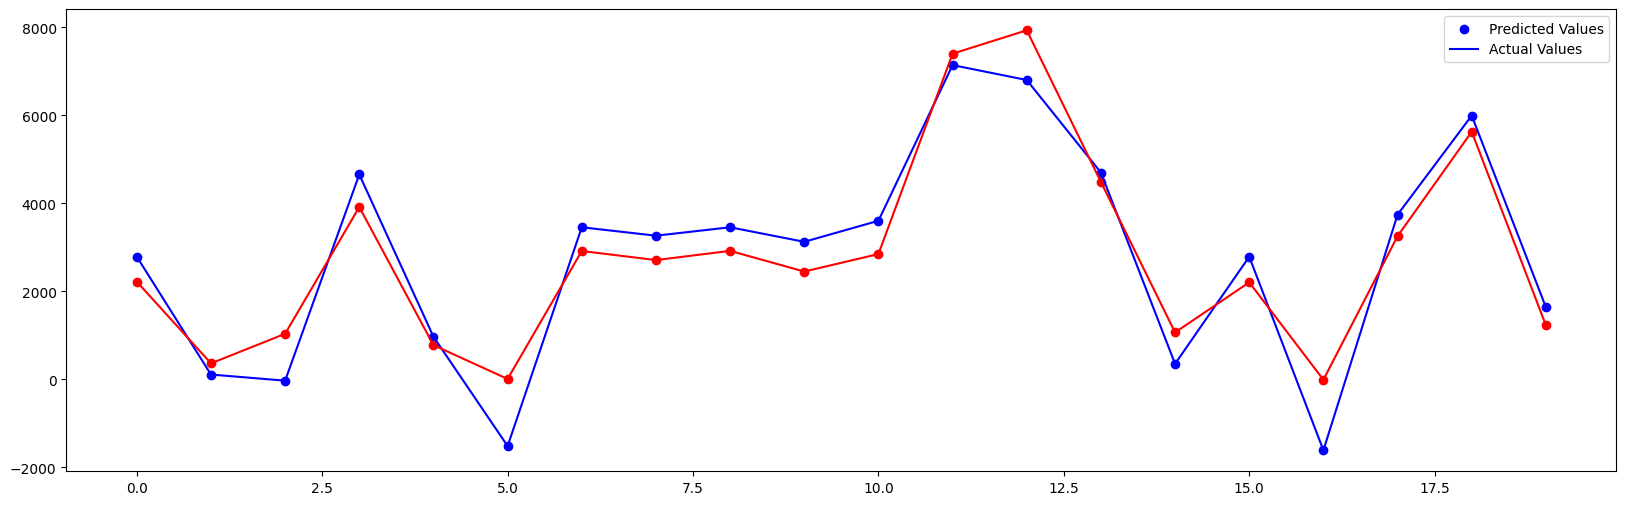

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the predicted values
ax.scatter(range(len(predictions)), predictions, c='blue')
ax.plot(range(len(predictions)), predictions, c='blue')

# Plot the actual values
ax.scatter(range(len(y2_test)), y2_test, c='red')
ax.plot(range(len(predictions)), y2_test, c='red')

# Add legend
ax.legend(['Predicted Values', 'Actual Values'])

## Findings for DATA 2
The model is performing good. Predicted values are completely correlated with the actual values.